![visioncolab](https://drive.google.com/uc?export=view&id=10UMKqKSnU2grmitxYxvL7V6GVMu8RrpP)


`Google colab's for image processing, pattern recognition and computer vision`

[Domingo Mery](https://domingomery.ing.puc.cl/) - Department of Computer Science - Universidad Católica de Chile

# Sampling Examples for Image Processing

In [1]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

In [2]:
!wget https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png
!wget https://www.dropbox.com/s/vjxcddg5rgap35i/scale.png

--2024-08-20 15:17:17--  https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc [following]
--2024-08-20 15:17:17--  https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc38fe38735d80137c12c5fcc91b.dl.dropboxusercontent.com/cd/0/inline/CZDlohObbiTO6mzonmJORPA3CHl9LJ7rzwD5LPouKEhd8kkR70GC_UO6zKT4suZ70nELc_FFckt8Ja4gbdSwET2ibdMOUezgrGyak0LabsInDXgtT4XaHkVlixMIkOJzmLc/file# [following]
--2024-08-20 15:17:17--  https://uc38fe38735d80137c12c5fcc91b.dl.dropboxusercontent.com/cd/0/inline/CZDlohObbiTO6mzonmJORPA3C

# How is the image?

In [3]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# Choose one image

In [4]:
st_img = 'mandril.png'
#st_img = 'scale.png'

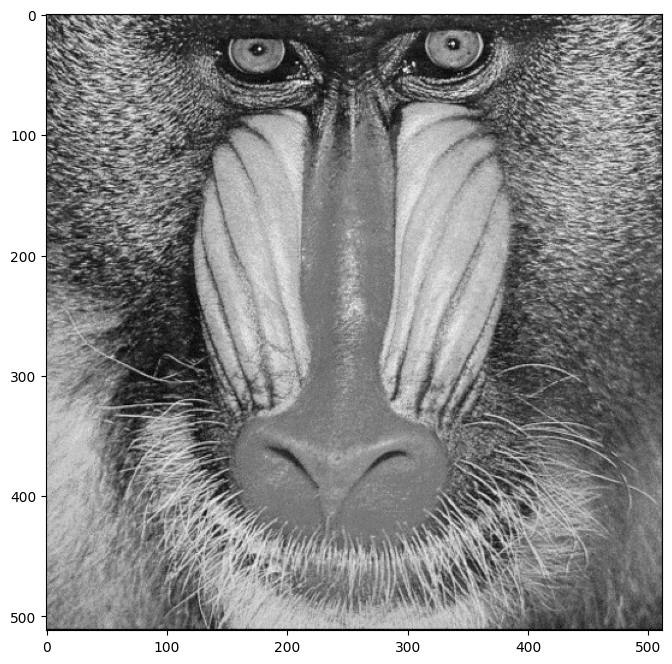

In [5]:
img = imread(st_img)
X = img[:,:,0]
plt.figure(figsize=(8,8))
plt.imshow(X,cmap='gray')
plt.show()

# Spatial Sampling

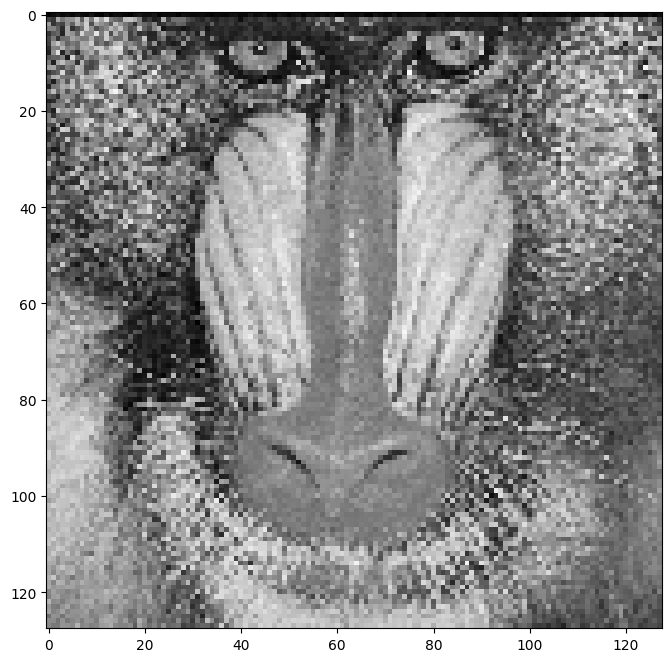

size =  (128, 128)
max  =  246
min  =  0


In [28]:
d = 4   # esto modifica la adquisición, la resolución espacial de la imagen, cada cuántos bits (los bits nos dan los tonos de grises, 2^{bit} = tono de gris)
(Nx,Mx) = X.shape
ix = range(0,Nx,d)
jx = range(0,Mx,d)
Ny = len(ix)
My = len(jx)
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    Y[i,j] = X[ix[i],jx[j]]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
howis(Y)

# Histogram

In [7]:
def imhist(X,n=256):
  """
  Esta es la función del histograma en 256 tonos de gris
  """
  (N,M) = X.shape # analizamos la imagen X
  h = np.zeros((n,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1 # aumentamos en 1 cada tono de gris h
  return h


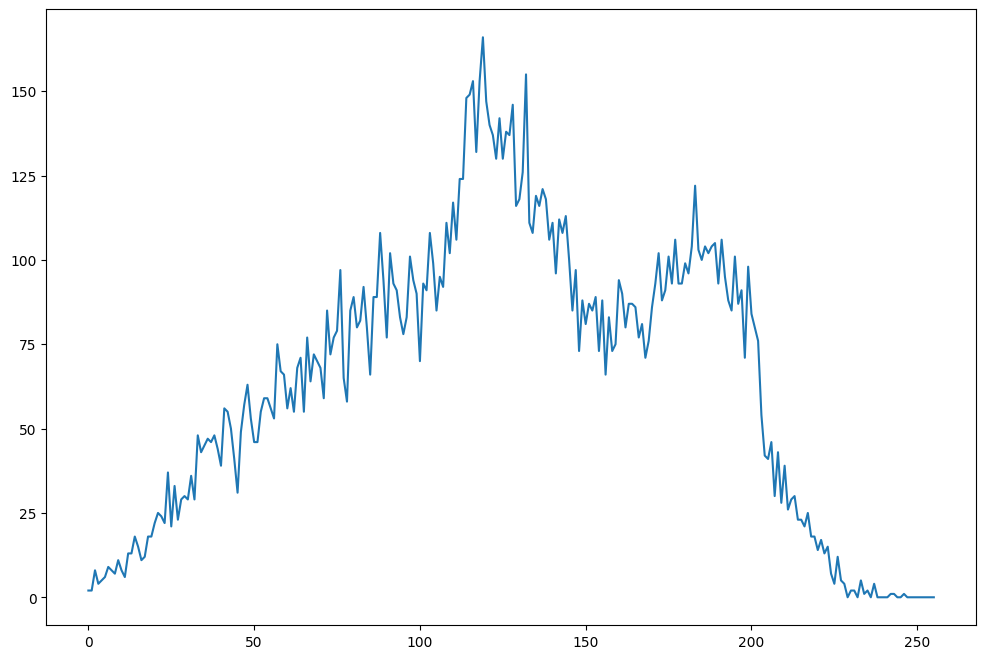

In [29]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()


# Quantization

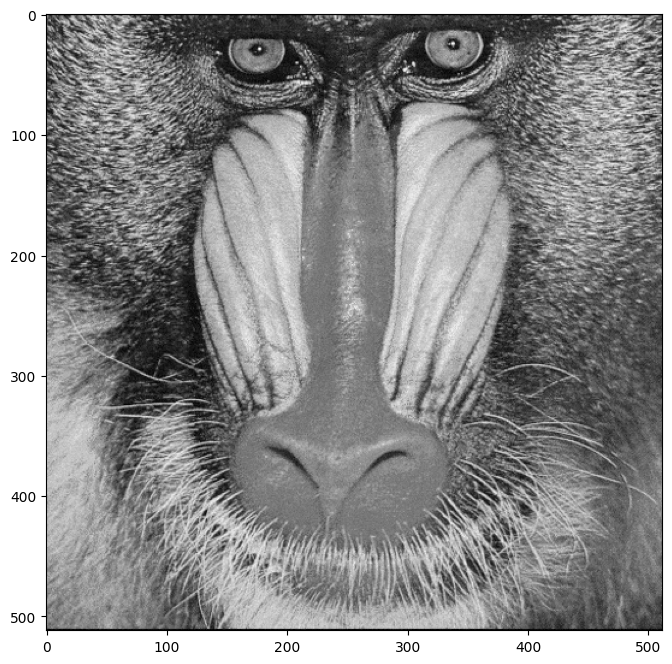

size =  (512, 512)
max  =  254
min  =  0
This image has =  128  grayvalues


In [26]:
p = 2  # each p grayvalues, estos son los tonos de gris, 2, 4, 8..., 256.

# esta imagen tiene muchos pixeles, por tanto aunque bajemos mucho p, el ojo humano promedia muchos pixeles
# el histograma anterior en cambio sí logra detectar estos cambios en la imagen Y

(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    x = int(np.fix(X[i,j]/p)*p)
    Y[i,j] = x
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
howis(Y)
print('This image has = ',int(256/p),' grayvalues')

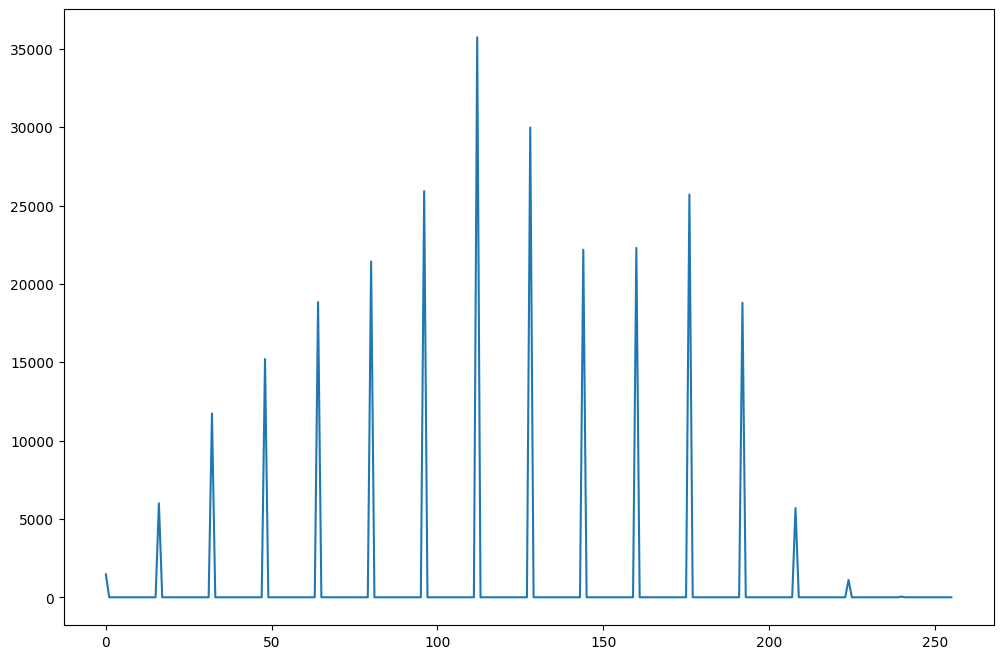

In [10]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()

In [11]:
print(h[0:256])

[ 1464.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.  5993.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. 11733.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0. 15207.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0. 18837.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 21429.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0. 25925.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. 35744.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0. 29984.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0